In [ ]:
# Install TA-Lib in Google Colab
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!sudo make install
!sudo apt upgrade
!pip install TA-Lib


--2023-11-02 00:43:21--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-02 00:43:21--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://zenlayer.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-11-02 00:43:21--  http://zenlayer.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving zenlayer.dl.s

In [ ]:
#Math and Operations
import numpy as np
import random
import math

#Data Analysis
import pandas as pd
from datetime import datetime
import pandas_datareader as data_reader

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Model(NN)
import tensorflow as tf
from tensorflow.keras import layers

#KMeans
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Financial
import talib

#Reinforcement Learning
import gym
from gym import spaces


from tqdm import tqdm_notebook, tqdm
from collections import deque

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
stock_knn=pd.read_csv('/content/KNNData.csv')

## EDA

In [ ]:
stock_knn.head()

,Company Name,CAGR(Last 5 yrs)%,PE(last 5 years),Volume(Last 5 years)Lakhs
0,ABB India Ltd,-2.92,19.3,22.10
1,ACC Ltd,8.83,16.4,24.13
2,Adani Energy Solutions Ltd,-13.33,30.3,1.62
3,Adani Enterprises Ltd,10.83,24.5,13.53
4,Adani Green Energy Ltd,23.28,45.1,1.49


In [ ]:
stock_knn.describe()

,CAGR(Last 5 yrs)%,PE(last 5 years),Volume(Last 5 years)Lakhs
count,100.000000,100.000000,1.000000e+02
mean,17.330600,20.467300,2.686551e+05
std,26.597077,12.954748,1.961569e+06
min,-15.270000,-9.100000,1.500000e-01
25%,12.280000,14.252500,1.947500e+00
50%,15.905000,18.400000,7.060000e+00
75%,18.827500,24.550000,1.225000e+01
max,257.880000,87.600000,1.712693e+07


NameError: ignored

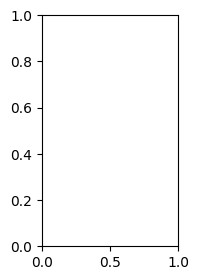

In [ ]:
plt.rcParams["figure.figsize"] = (25,3)
for idx, column in enumerate(x.columns):
    plt.subplot(1, 12, idx+1)
    sns.boxplot(x[column])
    plt.xlabel(column)
plt.show()

In [ ]:
# # metadata_numerical = metadata_numerical.reset_index()
# sns.pairplot(x)
# plt.show()

In [ ]:
def remove_outliers(data, threshold=3):
    # Calculate the z-score for each data point in each column
    z_scores = np.abs((data.iloc[:, 1:] - data.iloc[:, 1:].mean(axis=0)) / data.iloc[:, 1:].std(axis=0))

    # Identify data points that are more than the threshold standard deviations away from the mean
    outliers = np.any(z_scores > threshold, axis=1)

    # Remove outliers from the dataset
    filtered_data = data[~outliers]

    # Extract and reset the index for the filtered data
    filtered_data.reset_index(drop=True, inplace=True)

    return filtered_data

## KMeans

In [ ]:
stock_knn_filtered = remove_outliers(stock_knn)
stock_knn_filtered

,Company Name,CAGR(Last 5 yrs)%,PE(last 5 years),Volume(Last 5 years)Lakhs
0,ABB India Ltd,-2.92,19.3,22.10
1,ACC Ltd,8.83,16.4,24.13
2,Adani Energy Solutions Ltd,-13.33,30.3,1.62
3,Adani Enterprises Ltd,10.83,24.5,13.53
4,Adani Green Energy Ltd,23.28,45.1,1.49
...,...,...,...,...
90,United Spirits Ltd,20.08,16.5,0.15
91,UPL Ltd,15.58,15.9,8.57
92,Varun Beverages Ltd,18.98,29.9,1.43
93,Vedanta Ltd,16.88,11.7,7.43


In [ ]:
x = stock_knn_filtered.iloc[:,1:4]
x

,CAGR(Last 5 yrs)%,PE(last 5 years),Volume(Last 5 years)Lakhs
0,-2.92,19.3,22.10
1,8.83,16.4,24.13
2,-13.33,30.3,1.62
3,10.83,24.5,13.53
4,23.28,45.1,1.49
...,...,...,...
90,20.08,16.5,0.15
91,15.58,15.9,8.57
92,18.98,29.9,1.43
93,16.88,11.7,7.43


In [ ]:
scaler = MinMaxScaler()
xnorm = scaler.fit_transform(remove_outliers(x))

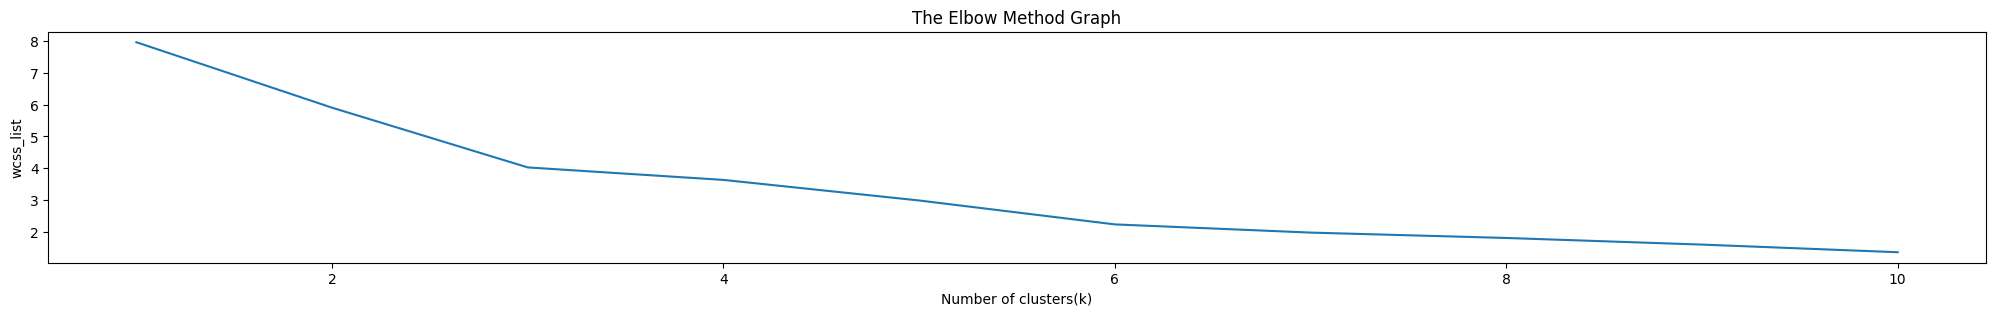

In [ ]:
#finding optimal number of clusters using the elbow method
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42, n_init='auto')
    kmeans.fit(xnorm)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 42, n_init='auto')
label= kmeans.fit_predict(xnorm)

In [ ]:
inertia = kmeans.inertia_
inertia

3.634740697116033

In [ ]:
label

array([2, 1, 2, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 0, 0, 3, 2, 0, 0,
       0, 1, 0, 0, 0, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 1, 3, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 0, 0, 0, 0, 1, 1, 2, 3, 2, 1, 1, 1, 3, 3, 3, 3, 1, 3,
       3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 0,
       3, 3, 3, 0, 3], dtype=int32)

In [ ]:
label_0 = xnorm[label == 0]
label_1 = xnorm[label == 1]
label_2 = xnorm[label == 2]
label_3 = xnorm[label == 3]

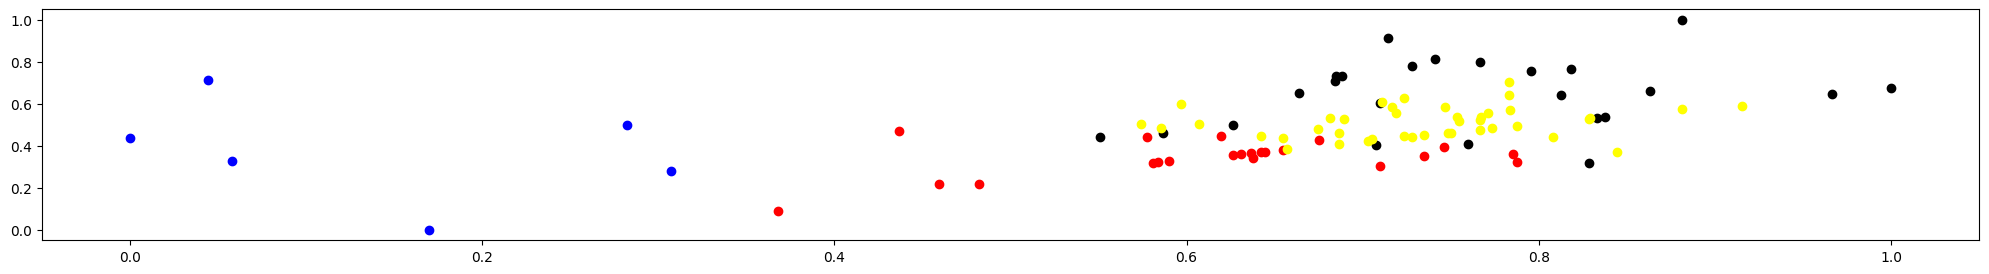

In [ ]:
plt.scatter([row[0] for row in label_0], [row[1] for row in label_0], color = 'red')
plt.scatter([row[0] for row in label_1], [row[1] for row in label_1], color = 'black')
plt.scatter([row[0] for row in label_2], [row[1] for row in label_2], color = 'blue')
plt.scatter([row[0] for row in label_3], [row[1] for row in label_3], color = 'yellow')
plt.show()

In [ ]:
cluster_number = 4  # Cluster number you want to retrieve names for
stocks_in_cluster = np.where(label == cluster_number-1)[0]

# Get the names of stocks in the cluster
stocks_names_in_cluster = stock_knn_filtered.iloc[stocks_in_cluster]['Company Name'].tolist()

print(f"Stocks in Cluster {cluster_number}:")
for stock_name in stocks_names_in_cluster:
    print(stock_name)

Stocks in Cluster 4:
Adani Enterprises Ltd
Ambuja Cements Ltd    
Apollo Hospitals Enterprise Ltd    
Axis Bank Ltd    
Berger Paints India Ltd    
Coal India Ltd    
Colgate-Palmolive (India) Ltd    
Dabur India Ltd    
DLF Ltd    
Dr. Reddys Laboratories Ltd    
Eicher Motors Ltd    
GAIL (India) Ltd    
Grasim Industries Ltd    
HCL Technologies Ltd    
HDFC Asset Management Company Ltd    
HDFC Life Insurance Company Ltd    
Hindalco Industries Ltd    
Hindustan Unilever Ltd    
ICICI Bank Ltd    
ICICI Lombard General Insurance Company Ltd    
Interglobe Aviation Ltd    
Larsen & Toubro Ltd    
Life Insurance Corporation of India    
LTIMindtree Ltd    
Mahindra & Mahindra Ltd    
Maruti Suzuki India Ltd    
Muthoot Finance Ltd    
NTPC Ltd    
Pidilite Industries Ltd    
Procter & Gamble Hygiene and Health Care Ltd    
SBI Cards And Payment Services Ltd    
Shree Cement Ltd    
SRF Ltd    
State Bank Of India    
Sun Pharmaceutical Industries Ltd    
Tata Power Company Ltd    
Te

In [ ]:
for i in range(4):
    stocks_in_cluster_i = np.where(label == i)[0]
    print(f"Cluster {i + 1} contains stocks:", stocks_in_cluster_i)

Cluster 1 contains stocks: [16 17 20 21 22 24 25 26 35 40 48 49 50 51 67 69 70 73 74 76 87 91]
Cluster 2 contains stocks: [ 1  4  5  6  7 10 11 13 14 15 23 37 42 44 52 53 57 58 59 64 78 82 83 85]
Cluster 3 contains stocks: [ 0  2 19 30 54 56]
Cluster 4 contains stocks: [ 3  8  9 12 18 27 28 29 31 32 33 34 36 38 39 41 43 45 46 47 55 60 61 62
 63 65 66 68 71 72 75 77 79 80 81 84 86 88 89 90 92]


In [ ]:
label_3.shape

(41, 3)

## Data Pre-Processing


# Historic Data

In [ ]:
historic=pd.read_csv("/content/2017.csv",index_col=0)

In [ ]:
historic.head()

,Ticker,Date,Time,Open,High,Low,Close,Volume,Open_Interest,DateTime
0,NIFTY BANK.NSE_IDX,2017-01-02,09:01:59,18177.2,18177.2,18177.2,18177.2,0,0,2017-01-02 09:01:59
1,NIFTY BANK.NSE_IDX,2017-01-02,09:02:59,18177.2,18177.2,18177.2,18177.2,0,0,2017-01-02 09:02:59
2,NIFTY BANK.NSE_IDX,2017-01-02,09:03:59,18177.2,18177.2,18177.2,18177.2,0,0,2017-01-02 09:03:59
3,NIFTY BANK.NSE_IDX,2017-01-02,09:04:59,18177.2,18177.2,18177.2,18177.2,0,0,2017-01-02 09:04:59
4,NIFTY BANK.NSE_IDX,2017-01-02,09:05:59,18177.2,18177.2,18177.2,18177.2,0,0,2017-01-02 09:05:59


In [ ]:
historic['Date'] = pd.to_datetime(historic['Date'])
historic['DateTime'] = pd.to_datetime(historic['DateTime'])
historic['Time'] = pd.to_datetime(historic['Time'], format='%H:%M:%S').dt.time
historic['DateTime'] = historic['DateTime'].dt.round('1min')

In [ ]:
historic = historic.drop(['Ticker', 'Volume', "Open_Interest"], axis=1)

In [ ]:
historic = historic.drop(['Date',"Time"], axis=1)

In [ ]:
historic.head()

,Open,High,Low,Close,DateTime
0,18177.2,18177.2,18177.2,18177.2,2017-01-02 09:02:00
1,18177.2,18177.2,18177.2,18177.2,2017-01-02 09:03:00
2,18177.2,18177.2,18177.2,18177.2,2017-01-02 09:04:00
3,18177.2,18177.2,18177.2,18177.2,2017-01-02 09:05:00
4,18177.2,18177.2,18177.2,18177.2,2017-01-02 09:06:00


In [ ]:
historic.columns

Index(['Open', 'High', 'Low', 'Close', 'DateTime'], dtype='object')